In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import statistics

In [3]:
import datetime as dt
from datetime import date

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

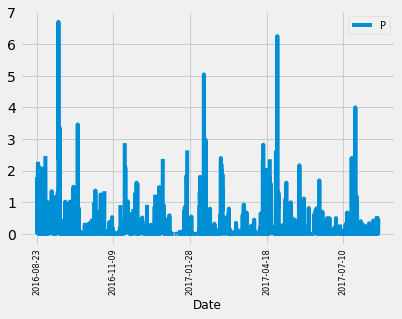

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = []

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
date_measurements_df = pd.DataFrame(results, columns=['date','precipitation'])
date_measurements_df.set_index(date_measurements_df['date'], inplace=True)

# Sort the dataframe by date
date_measurements_df = date_measurements_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
date_measurements_df.plot()
plt.xticks(rotation=90, fontsize=8)
plt.xlabel("Date", fontsize=12)
plt.legend("Precipitation", loc=1, fontsize=10)


#print(date_measurements_df) - test by BL the date index shows as column 1
#print(date_measurements_df.to_string(index=False))

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
date_measurements_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9,)]

In [13]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [15]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
temperature_observations_df=pd.DataFrame(results, columns=['tabs'])
print(temperature_observations_df)

     tabs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


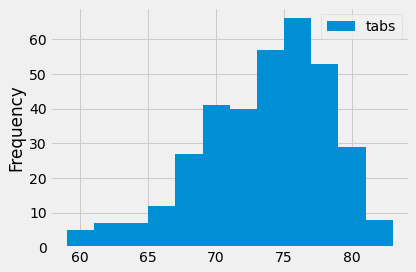

In [16]:
#plotting the above into a histogram
#using bins to divide the temp in 12 ranges
temperature_observations_df.plot.hist(bins=12)

#compress x axis label to fit in the plot
plt.tight_layout()

In [17]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

def calc_temps(start=None, end=None):
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]

    if not end:
        results = session.query(*sel).\
            filter(Measurement.date >= start).all()
        temps = list(np.ravel(results))
        return jsonify(temps)

    results = session.query(*sel).\
        filter(Measurement.date >= start).\
        filter(Measurement.date <= end).all()
    temps = list(np.ravel(results))
    return (temps)


In [18]:
start = date(2017,6,1)
end = date(2017,6,30)

temp_stats = [calc_temps(start, end)]
print(temp_stats)

[[71.0, 77.21989528795811, 83.0]]
